## Timings

In [ ]:
import os
import sys

In [ ]:
import pylab as plt
%matplotlib inline

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
data_folder = '/home/simon/git/vimms/experimental/data_20200503/timings'
qca_file = os.path.join(data_folder,'from_controller_fullscan_QCA.mzML')

In [ ]:
pymzm_folder = '/home/simon/git/pymzm'
sys.path.append(pymzm_folder)

In [ ]:
from mass_spec_utils.data_import.mzml import MZMLFile
qca_full = MZMLFile(qca_file)

In [ ]:
def extract_timings(mzml_file_object):
    time_dict = {(1,1):[],(1,2):[],(2,1):[],(2,2):[]}
    for i,s in enumerate(mzml_file_object.scans[:-1]):
        current = s.ms_level
        next_ = mzml_file_object.scans[i+1].ms_level
        tup = (current,next_)
        time_dict[tup].append(60*mzml_file_object.scans[i+1].rt_in_minutes - 60*s.rt_in_minutes)
    mean_times = {}
    for k,v in time_dict.items():
        if len(v) > 0:
            me = sum(v)/len(v)
            mean_times[k] = me
    return time_dict,mean_times

In [ ]:
time_dict,mean_times = extract_timings(qca_full)
print(mean_times)

plt.hist(time_dict[(1,1)],bins=20)
plt.title('Fullscan MS1 times, mean = {:.3f}'.format(mean_times[(1,1)]))
output_folder = '/home/simon/git/vimms/experimental/data_20200503/timings/'
plt.savefig(os.path.join(output_folder,'full.png'))

In [ ]:
# Load a topN for comparison
topn_file = '/home/simon/git/vimms/experimental/data_20200503/TopN_vs_ROI/from_controller_TopN_QCA.mzML'
topn_file_obj = MZMLFile(topn_file)
time_dict,mean_times = extract_timings(topn_file_obj)

plt.hist(time_dict[(1,2)])
plt.title('TopN MS1 times, mean = {:.3f}'.format(mean_times[(1,2)]))

plt.savefig(os.path.join(output_folder,'topn.png'))

In [ ]:
# Load a ROI for comparison
roi_file = '/home/simon/git/vimms/experimental/data_20200503/TopN_vs_ROI/from_controller_smart_ROI_QCA.mzML'
roi_file_obj = MZMLFile(roi_file)
time_dict,mean_times = extract_timings(roi_file_obj)
plt.hist(time_dict[(1,2)])
plt.title('ROI MS1 times, mean = {:.3f}'.format(mean_times[(1,2)]))
plt.savefig(os.path.join(output_folder,'roi.png'))

In [ ]:
plt.hist(time_dict[(2,2)])
plt.title('MS2 scan time, mean = {:.3f}'.format(mean_times[(2,2)]))
plt.savefig(os.path.join(output_folder,'ms2.png'))

Don't know what's going on with this one....

Loaded 1848 scans


Text(0.5, 1.0, 'Machine MS1 times, mean = 0.845')

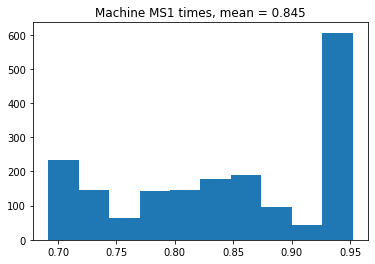

In [12]:
machine_file = '/home/simon/git/vimms/experimental/data_20200503/timings/QCB_fullscan.mzML'
machine_file_obj = MZMLFile(machine_file)
time_dict,mean_times = extract_timings(machine_file_obj)
plt.hist(time_dict[(1,1)])
plt.title('Machine MS1 times, mean = {:.3f}'.format(mean_times[(1,1)]))
# plt.savefig(os.path.join(output_folder,'machine.png'))

## Testing the ROI v TopN

### QCB


In [13]:
root = '/home/simon/git/vimms/experimental/data_20200503/TopN_vs_ROI'

In [14]:
pp_file = os.path.join(root,'from_controller_TopN_QCB_pp.csv')

In [15]:
from mass_spec_utils.data_import.mzmine import load_picked_boxes
boxes = load_picked_boxes(pp_file)

In [16]:
topn_file = os.path.join(root,'from_controller_TopN_QCB.mzML')
topn_file_obj = MZMLFile(topn_file)

Loaded 7045 scans


In [17]:
roi_file = os.path.join(root,'from_controller_smart_ROI_QCB.mzML')
roi_file_obj = MZMLFile(roi_file)

Loaded 5271 scans


In [18]:
def summarise(mz_file_object):
    n_scans = len(mz_file_object.scans)
    n_ms1_scans = len(list(filter(lambda x: x.ms_level == 1,mz_file_object.scans)))
    n_ms2_scans = len(list(filter(lambda x: x.ms_level == 2,mz_file_object.scans)))
    print("Total scans = {}, MS1 = {}, MS2 = {}".format(n_scans,n_ms1_scans,n_ms2_scans))
print("TopN:")
summarise(topn_file_obj)
print("ROI:")
summarise(roi_file_obj)


TopN:
Total scans = 7045, MS1 = 644, MS2 = 6401
ROI:
Total scans = 5271, MS1 = 1217, MS2 = 4054


In [19]:
from mass_spec_utils.data_import.mzmine import map_boxes_to_scans
topn_s2b,topn_b2s = map_boxes_to_scans(topn_file_obj,boxes,half_isolation_window=0)
roi_s2b,roi_b2s = map_boxes_to_scans(roi_file_obj,boxes,half_isolation_window=0)
print(len(topn_b2s))
print(len(roi_b2s))

1155
1457


### QCA


In [20]:
pp_file = os.path.join(root,'from_controller_TopN_QCA_pp.csv')
from mass_spec_utils.data_import.mzmine import load_picked_boxes
boxes = load_picked_boxes(pp_file)

In [21]:
topn_file = os.path.join(root,'from_controller_TopN_QCA.mzML')
topn_file_obj = MZMLFile(topn_file)
roi_file = os.path.join(root,'from_controller_smart_ROI_QCA.mzML')
roi_file_obj = MZMLFile(roi_file)

Loaded 7002 scans
Loaded 5008 scans


In [22]:
print("TopN:")
summarise(topn_file_obj)
print("ROI:")
summarise(roi_file_obj)

TopN:
Total scans = 7002, MS1 = 643, MS2 = 6359
ROI:
Total scans = 5008, MS1 = 1218, MS2 = 3790


In [23]:
topn_s2b,topn_b2s = map_boxes_to_scans(topn_file_obj,boxes,half_isolation_window=0)
roi_s2b,roi_b2s = map_boxes_to_scans(roi_file_obj,boxes,half_isolation_window=0)
print(len(topn_b2s))
print(len(roi_b2s))

986
1050


## TODO

- ~Run optimal with the QCA picked peaks. Where do we get to?~
- Run simulator with the QCA TopN as the seed file -- does the performance we see match?

In [24]:
sys.path.append('/home/simon/git/vimms')
from vimms.MassSpec import IndependentMassSpectrometer
from vimms.Controller import TopNController,RoiController,SmartRoiController
from vimms.Roi import make_roi, RoiToChemicalCreator
from vimms.BOMAS import *
from vimms.Common import *
from vimms.Environment import *
from pathlib import Path
from vimms.PlotsForPaper import get_frag_events

In [25]:
QCB_MZML2CHEMS_DICT = {'min_ms1_intensity': 0,
                  'mz_tol': 5,
                  'mz_units':'ppm',
                  'min_length':1,
                  'min_intensity':0,
                  'start_rt':0,
                  'stop_rt':1560}

In [26]:
ps_frag_QCB = load_obj('/home/simon/git/vimms/experimental/simon_res/QCB/peak_sampler_mz_rt_int_beerqcb_fragmentation.p')

In [ ]:
TopN_QCB_dataset = mzml2chems(os.path.join(root,'from_controller_TopN_QCB.mzML'), ps_frag_QCB, QCB_MZML2CHEMS_DICT, n_peaks=None)

In [ ]:
TopN_QCA_dataset = mzml2chems(os.path.join(root,'from_controller_TopN_QCA.mzML'), ps_frag_QCB, QCB_MZML2CHEMS_DICT, n_peaks=None)

In [ ]:
save_obj(TopN_QCB_dataset, os.path.join(root,'Simulator','TopN_QCB_dataset.mzml'))
save_obj(TopN_QCA_dataset, os.path.join(root,'Simulator','TopN_QCA_dataset.mzml'))


In [28]:
TopN_QCB_dataset = load_obj(os.path.join(root,'Simulator','TopN_QCB_dataset.mzml'))
TopN_QCA_dataset = load_obj(os.path.join(root,'Simulator','TopN_QCA_dataset.mzml'))

In [80]:
min_rt = 0
max_rt = 26*60 # entire run
min_ms1_intensity = 5000
mz_tol = 10
rt_tol = 15
N = 10


# these are derived from real data (see bottom of notebook)
roi_time_dict = {1: 0.71,2:0.20}
topn_time_dict = {1: 0.60,2:0.20}


ionisation_mode = POSITIVE
isolation_width = 1

output_folder = os.path.join(root,'Simulator','Output')
min_roi_intensity = 500
min_roi_length = 3 # still in scans, as to work in seconds, need to pass parameter. But doesn't matter when parameter below is equal to 1!
min_roi_length_for_fragmentation = 1


In [30]:
from vimms.MassSpec import IndependentMassSpectrometer
from vimms.Controller import TopNController,RoiController,SmartRoiController

In [31]:
from vimms.Environment import Environment

In [32]:
set_log_level_warning()

QCB topN

In [ ]:
controller = TopNController(ionisation_mode, N, isolation_width, mz_tol, rt_tol, min_ms1_intensity)

mass_spec = IndependentMassSpectrometer(ionisation_mode, TopN_QCB_dataset,
                                        ps_frag_QCB, add_noise=True,
                                       scan_duration_dict = topn_time_dict)

env = Environment(mass_spec, controller, min_rt, max_rt, progress_bar=True)
env.run()

env.write_mzML(output_folder,'qcb_topn.mzml')

QCA TopN

In [ ]:
controller = TopNController(ionisation_mode, N, isolation_width, mz_tol, rt_tol, min_ms1_intensity)

mass_spec = IndependentMassSpectrometer(ionisation_mode, TopN_QCA_dataset,
                                        ps_frag_QCB, add_noise=True,
                                       scan_duration_dict = topn_time_dict)

env = Environment(mass_spec, controller, min_rt, max_rt, progress_bar=True)
env.run()
env.write_mzML(output_folder,'qca_topn.mzml')

In [110]:
from vimms.Controller import OptimalTopNController


QCB Optimal

In [131]:
pp_file = os.path.join(root,'from_controller_TopN_QCB_pp.csv')
boxes = load_picked_boxes(pp_file)
score_method = 'intensity'

controller = OptimalTopNController(ionisation_mode, N, isolation_width, mz_tol, rt_tol,
                                   min_ms1_intensity,boxes,
                                   score_method = score_method)
mass_spec = IndependentMassSpectrometer(ionisation_mode, TopN_QCB_dataset,
                                        ps_frag_QCB, add_noise=True,
                                       scan_duration_dict = topn_time_dict)

env = Environment(mass_spec, controller, min_rt, max_rt, progress_bar=True)
env.run()
env.write_mzML(output_folder,'qcb_optimal_{}.mzml'.format(score_method))

(1560.600s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.9999999999948/1560 [01:21<00:00, 19.16it/s]


QCA Optimal

In [132]:
pp_file = os.path.join(root,'from_controller_TopN_QCA_pp.csv')
score_method = 'intensity'
boxes = load_picked_boxes(pp_file)
controller = OptimalTopNController(ionisation_mode, N, isolation_width, mz_tol, rt_tol,
                                   min_ms1_intensity,pp_file,
                                  score_method = score_method)
mass_spec = IndependentMassSpectrometer(ionisation_mode, TopN_QCA_dataset,
                                        ps_frag_QCB, add_noise=True,
                                       scan_duration_dict = topn_time_dict)

env = Environment(mass_spec, controller, min_rt, max_rt, progress_bar=True)
env.run()
env.write_mzML(output_folder,'qca_optimal_{}.mzml'.format(score_method))

Loaded 5186 boxes


(1560.400s) ms_level=1 N=10 DEW=15: 100%|█████████▉| 1559.7999999999881/1560 [01:17<00:00, 20.23it/s]


In [115]:
def evaluate(mzml_file,peak_file):
    mzml_file_obj = MZMLFile(mzml_file)
    boxes = load_picked_boxes(peak_file)
    s2b,b2s = map_boxes_to_scans(mzml_file_obj,boxes,half_isolation_window=0,allow_last_overlap=True)
    n_scans = len(mzml_file_obj.scans)
    n_ms1_scans = len(list(filter(lambda x: x.ms_level == 1,mzml_file_obj.scans)))
    n_ms2_scans = len(list(filter(lambda x: x.ms_level == 2,mzml_file_obj.scans)))
    
    # compute average absolute difference in seconds between ms2 scan and peak apex
    errs = []
    for b,scans in b2s.items():
        rt = b.rt_in_seconds
        scan_times = [s.rt_in_seconds for s in scans]
        temp_err = [abs(s-rt) for s in scan_times]
        errs.append(min(temp_err))
    
    print("Total scans = {}, MS1 = {}, MS2 = {}".format(n_scans,n_ms1_scans,n_ms2_scans))
    print("Total boxes: ",len(boxes),"Fragmented: ",len(b2s))
    print("Mean absolute error: ",np.mean(errs))

In [116]:
mz2pp = {os.path.join(output_folder,'qca_optimal.mzml'):os.path.join(root,'from_controller_TopN_QCA_pp.csv'),
         os.path.join(output_folder,'qcb_optimal.mzml'):os.path.join(root,'from_controller_TopN_QCB_pp.csv'),
        os.path.join(output_folder,'qca_topn.mzml'):os.path.join(root,'from_controller_TopN_QCA_pp.csv'),
         os.path.join(output_folder,'qcb_topn.mzml'):os.path.join(root,'from_controller_TopN_QCB_pp.csv'),
         os.path.join(output_folder,'qcb_optimal_2.mzml'):os.path.join(root,'from_controller_TopN_QCB_pp.csv')}

mz2pp = {os.path.join(output_folder,'qcb_optimal.mzml'):os.path.join(root,'from_controller_TopN_QCB_pp.csv'),
         os.path.join(output_folder,'qcb_optimal_urgency.mzml'):os.path.join(root,'from_controller_TopN_QCB_pp.csv'),
         os.path.join(output_folder,'qcb_optimal_apex.mzml'):os.path.join(root,'from_controller_TopN_QCB_pp.csv'),
         os.path.join(output_folder,'qcb_optimal_random.mzml'):os.path.join(root,'from_controller_TopN_QCB_pp.csv')}


for k,v in mz2pp.items():
    print(k.split(os.sep)[-1],v.split(os.sep)[-1])
    evaluate(k,v)
    print()
    print()

qcb_optimal.mzml from_controller_TopN_QCB_pp.csv
Loaded 4266 scans
Total scans = 4266, MS1 = 1711, MS2 = 2555
Total boxes:  5667 Fragmented:  2560
Mean absolute error:  14.357589947553805


qcb_optimal_urgency.mzml from_controller_TopN_QCB_pp.csv
Loaded 4316 scans
Total scans = 4316, MS1 = 1630, MS2 = 2686
Total boxes:  5667 Fragmented:  2692
Mean absolute error:  17.20212011653345


qcb_optimal_apex.mzml from_controller_TopN_QCB_pp.csv
Loaded 4291 scans
Total scans = 4291, MS1 = 1667, MS2 = 2624
Total boxes:  5667 Fragmented:  2628
Mean absolute error:  13.67822969217118


qcb_optimal_random.mzml from_controller_TopN_QCB_pp.csv
Loaded 4249 scans
Total scans = 4249, MS1 = 1704, MS2 = 2545
Total boxes:  5667 Fragmented:  2550
Mean absolute error:  15.679441694055122




*TODO*

- Why more boxes fragmented than scans? Must imply overlapping boxes?
- Check this

In [129]:
boxes = load_picked_boxes(os.path.join(root,'from_controller_TopN_QCB_pp.csv'))
mzml_file_obj = MZMLFile(os.path.join(output_folder,'qcb_optimal.mzml'))
mzml_file_obj = MZMLFile(os.path.join(root,'from_controller_TopN_QCB.mzML'))

s2b,b2s = map_boxes_to_scans(mzml_file_obj,boxes,half_isolation_window=0,allow_last_overlap=True)
multi_boxes = list(filter(lambda x: len(s2b[x])>1,list(s2b.keys())))

Loaded 4266 scans
Loaded 7045 scans


In [130]:
mb = multi_boxes[0]
print(mb.rt_in_seconds,mb.precursor_mz)
for box in s2b[mb]:
    print(box.mz_range,box.rt_range_in_seconds)

70.9074114079998 252.0252227783203
[252.02505493164062, 252.0253448486328] [48.64181555299998, 170.694868752]
[252.02508544921875, 252.0253448486328] [30.573936528, 94.2535038889998]


Checking back in the file -- this is just a shitty peak that has been picked as two shitty peaks